In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
data_train=pd.read_excel('Q2_classification_train.xlsx')
data_test=pd.read_excel('Q2_classification_test.xlsx')

In [ ]:
print("Train", data_train.head())
print("Test",data_test.head())

Train    spam  to_multiple  from  cc  ...  exclaim_subj  urgent_subj  exclaim_mess  number
0     0            0     1   0  ...             0            0             0     big
1     0            0     1   0  ...             0            0             1   small
2     0            0     1   0  ...             0            0            48   small
3     0            0     1   0  ...             0            0             1    none
4     0            0     1   0  ...             0            0             1    none

[5 rows x 20 columns]
Test    spam  to_multiple  from  cc  ...  exclaim_subj  urgent_subj  exclaim_mess  number
0     1            0     1   0  ...             0            0             8   small
1     1            0     1   0  ...             0            0             4   small
2     1            0     1   0  ...             0            0             0    none
3     1            0     1   4  ...             0            0             3   small
4     1            0     1   0 

In [ ]:
data_train.isnull().sum()

spam            0
to_multiple     0
from            0
cc              0
sent_email      0
image           0
attach          0
dollar          0
winner          0
inherit         0
viagra          0
password        0
num_char        0
line_breaks     0
format          0
re_subj         0
exclaim_subj    0
urgent_subj     0
exclaim_mess    0
number          0
dtype: int64

In [ ]:
data_train['number'].value_counts()

small    2271
none      438
big       427
Name: number, dtype: int64

In [ ]:
data_train['winner'].value_counts()

no     3088
yes      48
Name: winner, dtype: int64

In [ ]:
data_train['spam'].value_counts()

0    2842
1     294
Name: spam, dtype: int64

In [ ]:
data_test['spam'].value_counts()

0    712
1     73
Name: spam, dtype: int64

a) Converting Text variables (winner and number) into numerical represntation

In [ ]:
data_train=pd.get_dummies(data=data_train,columns= ['winner'], drop_first=True)
data_train=pd.get_dummies(data=data_train,columns= ['number'], drop_first=True)
data_train.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,winner_yes,number_none,number_small
0,0,0,1,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,0,0,1
3,0,0,1,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,0,1,0
4,0,0,1,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,0,1,0


In [ ]:
data_test=pd.get_dummies(data=data_test,columns= ['winner'], drop_first=True)
data_test=pd.get_dummies(data=data_test,columns= ['number'], drop_first=True)
data_test.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,winner_yes,number_none,number_small
0,1,0,1,0,0,0,0,0,0,0,0,20.133,364,1,0,0,0,8,0,0,1
1,1,0,1,0,0,0,0,0,0,0,0,3.796,71,1,0,0,0,4,0,0,1
2,1,0,1,0,0,0,0,0,0,0,0,2.705,35,1,0,0,0,0,0,1,0
3,1,0,1,4,0,0,2,0,0,0,0,0.537,22,0,0,0,0,3,0,0,1
4,1,0,1,0,0,0,0,0,0,0,0,4.174,2,0,0,0,0,0,0,1,0


In [ ]:
data_train.describe()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,winner_yes,number_none,number_small
count,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000
mean,0.093750,0.162946,0.999362,0.398916,0.266263,0.043048,0.128827,1.425383,0.035395,0.002551,0.109375,10.900418,234.274235,0.695153,0.252232,0.079719,0.002232,6.673151,0.015306,0.139668,0.724171
std,0.291527,0.369376,0.025250,2.618421,0.442074,0.441539,0.743275,4.734028,0.259475,0.142857,1.028693,14.876602,321.446484,0.460416,0.434363,0.270901,0.047200,52.684811,0.122787,0.346698,0.447002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.499000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.060500,124.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.538250,305.250000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,64.000000,1.000000,20.000000,21.000000,64.000000,9.000000,8.000000,28.000000,190.087000,4022.000000,1.000000,1.000000,1.000000,1.000000,1236.000000,1.000000,1.000000,1.000000


In [ ]:
pip install seaborn

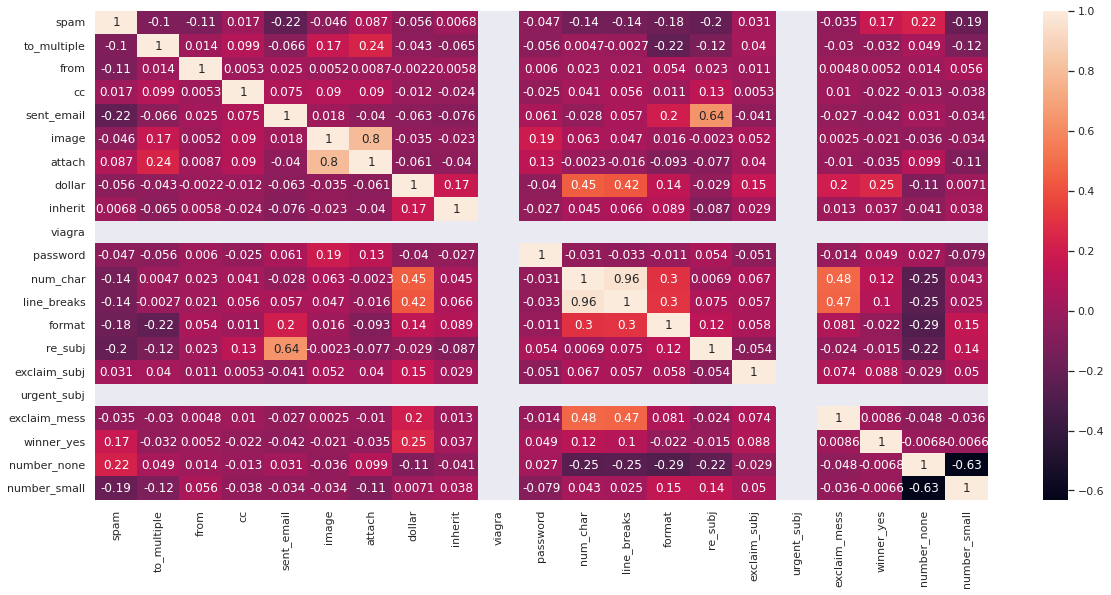

In [ ]:
import seaborn as sns
corr=data_test.corr()
sns.set(rc = {'figure.figsize':(20,9)})
sns.heatmap(corr, annot=True)

In [ ]:
Y = data_train["spam"]
features=["to_multiple", "from", "cc", "sent_email", "image", "dollar", "inherit", "viagra", "password", "num_char", 
          "num_char", "line_breaks", "format", "re_subj", "exclaim_subj", "urgent_subj", "exclaim_mess", "winner_yes",
          "number_none", "number_small"]
X = data_train[features]

b) Classification Models using trainig data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, random_state=27)
X = pd.concat([X_train, y_train], axis=1)

In [ ]:
not_spam = X[X.spam==0]
spam = X[X.spam==1]

c) Class imbalance handling

In [ ]:
spam_upsampled = resample(spam, replace=True, n_samples=len(not_spam), random_state=27)
upsampled = pd.concat([not_spam, spam_upsampled])

In [ ]:
upsampled['spam'].value_counts()

1    2127
0    2127
Name: spam, dtype: int64

In [ ]:
y_train = upsampled['spam']
X_train = upsampled.drop('spam', axis = 1 )

d) Classification models and tuned hyperparameters

In [ ]:
clf_NB = GaussianNB(priors = None, var_smoothing = 1e-9)
clf_LR = LogisticRegression(C=1e6)
clf_Soft_margin_SVM = SVC(C = 0.1)
clf_DT = DecisionTreeClassifier(criterion = "entropy", splitter = "best")
clf_RF = RandomForestClassifier(n_estimators = 100, criterion = "entropy")
clf_KM = SVC(kernel = 'rbf')

In [ ]:
clf_NB.fit(X_train, y_train)
clf_LR.fit(X_train, y_train)
clf_Soft_margin_SVM.fit(X_train, y_train)
clf_DT.fit(X_train, y_train)
clf_RF.fit(X_train, y_train)
clf_KM.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


SVC()

In [ ]:
y_hat_test = clf_NB.predict(X_val)
y_hat_test1 = clf_LR.predict(X_val)
y_hat_test2 = clf_Soft_margin_SVM.predict(X_val)
y_hat_test3 = clf_DT.predict(X_val)
y_hat_test4 = clf_RF.predict(X_val)

e) Classification Model Performance

In [ ]:
from sklearn.metrics import classification_report
train_cr = classification_report(y_val, y_hat_test)
print("Train Report: Naive Bayes")
print(train_cr)
train_cr = classification_report(y_val, y_hat_test1)
print("Train Report: Logistic Regression")
print(train_cr)
train_cr = classification_report(y_val, y_hat_test2)
print("Train Report: SVM")
print(train_cr)
train_cr = classification_report(y_val, y_hat_test3)
print("Train Report: Decision Tree")
print(train_cr)
train_cr = classification_report(y_val, y_hat_test4)
print("Train Report: Random Forest")
print(train_cr)
#test_cr = classification_report(test_y, predicted_test_y)
#print("Test Report:")
#print(test_cr)

Train Report: Naive Bayes
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       715
           1       0.31      0.55      0.40        69

    accuracy                           0.85       784
   macro avg       0.63      0.72      0.66       784
weighted avg       0.90      0.85      0.87       784

Train Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.79      0.88       715
           1       0.27      0.78      0.40        69

    accuracy                           0.79       784
   macro avg       0.62      0.79      0.64       784
weighted avg       0.91      0.79      0.83       784

Train Report: SVM
              precision    recall  f1-score   support

           0       0.96      0.59      0.73       715
           1       0.15      0.72      0.24        69

    accuracy                           0.60       784
   macro avg       0.55      0.66      0.49       

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of Naive Bayes", accuracy_score(y_val, y_hat_test))
print("Accuracy of Logistic Regression", accuracy_score(y_val, y_hat_test1))
print("Accuracy of SVM", accuracy_score(y_val, y_hat_test2))
print("Accuracy of Decision Tree", accuracy_score(y_val, y_hat_test3))
print("Accuracy of Random Forest", accuracy_score(y_val, y_hat_test4))
print("Accuracy of Kernel Machine", accuracy_score(y_val, y_hat_test5))

Accuracy of Naive Bayes 0.8545918367346939
Accuracy of Logistic Regression 0.7933673469387755
Accuracy of SVM 0.6007653061224489
Accuracy of Decision Tree 0.9196428571428571
Accuracy of Random Forest 0.9362244897959183
Accuracy of Kernel Machine 0.6632653061224489


In [ ]:
from sklearn.metrics import precision_score
print("Precision of Naive Bayes", precision_score(y_val, y_hat_test, average=None))
print("Precision of Logistic Regression", precision_score(y_val, y_hat_test1, average=None))
print("Precision of SVM", precision_score(y_val, y_hat_test2, average=None))
print("Precision of Decision Tree", precision_score(y_val, y_hat_test3, average=None))
print("Precision of Random Forest", precision_score(y_val, y_hat_test4, average=None))
print("Precision of Kernel Machine", precision_score(y_val, y_hat_test5, average=None))

Precision of Naive Bayes [0.95324284 0.31404959]
Precision of SVM [0.97427101 0.26865672]
Precision of Logistic Regression [0.96788991 0.36923077]
Precision of Decision Tree [0.9657632  0.54216867]
Precision of Random Forest [0.96493689 0.61971831]
Precision of Kernel Machine [0.96303901 0.17171717]


In [ ]:
from sklearn.metrics import recall_score
print("Recall of Naive Bayes", recall_score(y_val, y_hat_test, average=None))
print("Recall of Logistic Regression", recall_score(y_val, y_hat_test1, average=None))
print("Recall of SVM", recall_score(y_val, y_hat_test2, average=None))
print("Recall of Decision Tree", recall_score(y_val, y_hat_test3, average=None))
print("Recall of Random Forest", recall_score(y_val, y_hat_test4, average=None))
print("Recall of Kernel Machine", recall_score(y_val, y_hat_test5, average=None))

Recall of Naive Bayes [0.88391608 0.55072464]
Recall of SVM [0.79440559 0.7826087 ]
Recall of Logistic Regression [0.88531469 0.69565217]
Recall of Decision Tree [0.94685315 0.65217391]
Recall of Random Forest [0.96223776 0.63768116]
Recall of Kernel Machine [0.65594406 0.73913043]


In [ ]:
from sklearn.metrics import f1_score
print("F1 Score of Naive Bayes", f1_score(y_val, y_hat_test, average=None))
print("F1 Score of SVM", f1_score(y_val, y_hat_test1, average=None))
print("F1 Score of Logistic Regression", f1_score(y_val, y_hat_test2, average=None))
print("F1 Score of Decision Tree", f1_score(y_val, y_hat_test3, average=None))
print("F1 Score of Random Forest", f1_score(y_val, y_hat_test4, average=None))
print("F1 Score of Kernel Machine", f1_score(y_val, y_hat_test5, average=None))

F1 Score of Naive Bayes [0.91727141 0.4       ]
F1 Score of SVM [0.8751926 0.4      ]
F1 Score of Logistic Regression [0.9247626  0.48241206]
F1 Score of Decision Tree [0.95621469 0.59210526]
F1 Score of Random Forest [0.96358543 0.62857143]
F1 Score of Kernel Machine [0.78036606 0.27868852]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print("NB", confusion_matrix(y_val, y_hat_test))
print("Logistic Regression", confusion_matrix(y_val, y_hat_test1))
print("SVM", confusion_matrix(y_val, y_hat_test2))
print("Decision Tree", confusion_matrix(y_val, y_hat_test3))
print("Random Forest", confusion_matrix(y_val, y_hat_test4))
print("Kernel Machine", confusion_matrix(y_val, y_hat_test5))

NB [[632  83]
 [ 31  38]]
SVM [[568 147]
 [ 15  54]]
Logistic Regression [[633  82]
 [ 21  48]]
Decision Tree [[677  38]
 [ 24  45]]
Random Forest [[688  27]
 [ 25  44]]
Kernel Machine [[469 246]
 [ 18  51]]


In [ ]:
not_spam_test = data_test[data_test.spam==0]
spam_test = data_test[data_test.spam==1]

In [ ]:
spam_upsampled_test = resample(spam_test, replace=True, n_samples=len(not_spam_test), random_state=27)
upsampled_test = pd.concat([not_spam_test, spam_upsampled_test])
upsampled_test['spam'].value_counts()

1    712
0    712
Name: spam, dtype: int64

In [ ]:
y = data_test["spam"]
x = data_test[features]

In [ ]:
y_predict = clf_NB.predict(x)
y_predict1 = clf_LR.predict(x)
y_predict2 = clf_Soft_margin_SVM.predict(x)
y_predict3 = clf_DT.predict(x)
y_predict4 = clf_RF.predict(x)
y_predict5 = clf_KM.predict(x)

In [ ]:
print("Accuracy of Naive Bayes for test set", accuracy_score(y, y_predict))
print("Accuracy of Logistic Regression for test set", accuracy_score(y, y_predict1))
print("Accuracy of SVM for test set", accuracy_score(y, y_predict2))
print("Accuracy of Decision Tree for test set", accuracy_score(y, y_predict3))
print("Accuracy of Random Forest for test set", accuracy_score(y, y_predict4))
print("Accuracy of Kernel Machine for test set", accuracy_score(y, y_predict5))

Accuracy of Naive Bayes for test set 0.8904458598726115
Accuracy of SVM for test set 0.778343949044586
Accuracy of Logistic Regression for test set 0.8624203821656051
Accuracy of Decision Tree for test set 0.9146496815286624
Accuracy of Random Forest for test set 0.9286624203821656
Accuracy of Kernel Machine for test set 0.6496815286624203


In [ ]:
print("Precision of Naive Bayes for test set", precision_score(y, y_predict, average=None))
print("Precision of SVM for test set", precision_score(y, y_predict1, average=None))
print("Precision of Logistic Regression for test set", precision_score(y, y_predict2, average=None))
print("Precision of Decision Tree for test set", precision_score(y, y_predict3, average=None))
print("Precision of Random Forest for test set", precision_score(y, y_predict4, average=None))
print("Precision of Kernel Machine for test set", precision_score(y, y_predict5, average=None))

Precision of Naive Bayes for test set [0.96165192 0.43925234]
Precision of SVM for test set [0.96864111 0.26066351]
Precision of Logistic Regression for test set [0.9689441  0.37588652]
Precision of Decision Tree for test set [0.94482759 0.55      ]
Precision of Random Forest for test set [0.95429363 0.63492063]
Precision of Kernel Machine for test set [0.97603486 0.19018405]


In [ ]:
 print("Recall of Naive Bayes for test set", recall_score(y, y_predict, average=None))
print("Recall of SVM for test set", recall_score(y, y_predict1, average=None))
print("Recall of Logistic Regression for test set", recall_score(y, y_predict2, average=None))
print("Recall of Decision Tree for test set", recall_score(y, y_predict3, average=None))
print("Recall of Random Forest for test set", recall_score(y, y_predict4, average=None))
print("Recall of Kernel Machine for test set", recall_score(y, y_predict5, average=None))

Recall of Naive Bayes for test set [0.91573034 0.64383562]
Recall of SVM for test set [0.78089888 0.75342466]
Recall of Logistic Regression for test set [0.87640449 0.7260274 ]
Recall of Decision Tree for test set [0.96207865 0.45205479]
Recall of Random Forest for test set [0.96769663 0.54794521]
Recall of Kernel Machine for test set [0.62921348 0.84931507]


In [ ]:
print("F1 Score of Naive Bayes for test set", f1_score(y, y_predict, average=None))
print("F1 Score of SVM for test set", f1_score(y, y_predict1, average=None))
print("F1 Score of Logistic Regression for test set", f1_score(y, y_predict2, average=None))
print("F1 Score of Decision Tree for test set", f1_score(y, y_predict3, average=None))
print("F1 Score of Random Forest for test set", f1_score(y, y_predict4, average=None))
print("F1 Score of Kernel Machine for test set", f1_score(y, y_predict5, average=None))

F1 Score of Naive Bayes for test set [0.9381295  0.52222222]
F1 Score of SVM for test set [0.86469673 0.38732394]
F1 Score of Logistic Regression for test set [0.92035398 0.4953271 ]
F1 Score of Decision Tree for test set [0.95337509 0.4962406 ]
F1 Score of Random Forest for test set [0.9609484  0.58823529]
F1 Score of Kernel Machine for test set [0.76515798 0.31077694]


In [ ]:
print("NB for test set", confusion_matrix(y, y_predict))
print("Logistic Regression for test set", confusion_matrix(y, y_predict1))
print("SVM for test set", confusion_matrix(y, y_predict2))
print("Decision Tree for test set", confusion_matrix(y, y_predict3))
print("Random Forest for test set", confusion_matrix(y, y_predict4))
print("Kernel Machine for test set", confusion_matrix(y, y_predict5))

NB for test set [[652  60]
 [ 26  47]]
SVM for test set [[556 156]
 [ 18  55]]
Logistic Regression for test set [[624  88]
 [ 20  53]]
Decision Tree for test set [[685  27]
 [ 40  33]]
Random Forest for test set [[689  23]
 [ 33  40]]
Kernel Machine for test set [[448 264]
 [ 11  62]]


f) Normalization Scheme

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
scaled = normalize.fit_transform(X_train)

In [ ]:
scaled

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
clf_NB = GaussianNB(priors = None, var_smoothing = 1e-9)
clf_LR = LogisticRegression(C=1e6)
clf_Soft_margin_SVM = SVC(C = 0.1)
clf_DT = DecisionTreeClassifier(criterion = "entropy", splitter = "best")
clf_RF = RandomForestClassifier(n_estimators = 100, criterion = "entropy")
clf_KM = SVC(kernel = 'rbf')

In [ ]:
clf_NB.fit(X_train, y_train)
clf_LR.fit(X_train, y_train)
clf_Soft_margin_SVM.fit(X_train, y_train)
clf_DT.fit(X_train, y_train)
clf_RF.fit(X_train, y_train)
clf_KM.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


SVC()

In [ ]:
train_cr = classification_report(y_val, y_hat_test)
print("Train Report: Naive Bayes")
print(train_cr)
train_cr = classification_report(y_val, y_hat_test1)
print("Train Report: Logistic Regression")
print(train_cr)
train_cr = classification_report(y_val, y_hat_test2)
print("Train Report: SVM")
print(train_cr)
train_cr = classification_report(y_val, y_hat_test3)
print("Train Report: Decision Tree")
print(train_cr)
train_cr = classification_report(y_val, y_hat_test4)
print("Train Report: Random Forest")
print(train_cr)

Train Report: Naive Bayes
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       715
           1       0.31      0.55      0.40        69

    accuracy                           0.85       784
   macro avg       0.63      0.72      0.66       784
weighted avg       0.90      0.85      0.87       784

Train Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.79      0.88       715
           1       0.27      0.78      0.40        69

    accuracy                           0.79       784
   macro avg       0.62      0.79      0.64       784
weighted avg       0.91      0.79      0.83       784

Train Report: SVM
              precision    recall  f1-score   support

           0       0.96      0.59      0.73       715
           1       0.15      0.72      0.24        69

    accuracy                           0.60       784
   macro avg       0.55      0.66      0.49       

In [ ]:
print("Accuracy of Naive Bayes for test set", accuracy_score(y, y_predict))
print("Accuracy of Logistic Regression for test set", accuracy_score(y, y_predict1))
print("Accuracy of SVM for test set", accuracy_score(y, y_predict2))
print("Accuracy of Decision Tree for test set", accuracy_score(y, y_predict3))
print("Accuracy of Random Forest for test set", accuracy_score(y, y_predict4))
print("Accuracy of Kernel Machine for test set", accuracy_score(y, y_predict5))

Accuracy of Naive Bayes for test set 0.8904458598726115
Accuracy of Logistic Regression for test set 0.778343949044586
Accuracy of SVM for test set 0.8624203821656051
Accuracy of Decision Tree for test set 0.9146496815286624
Accuracy of Random Forest for test set 0.9286624203821656
Accuracy of Kernel Machine for test set 0.6496815286624203
